# 3-Bit Adder Using Quantum Circuits

## Introduction

In this project, I will show how to add 3 bits using quantum circuits in Qiskit using NOT, CNOT and Toffoli gates. This will include a part of the circuit that encodes the input, a part that executes the algorithm, and a part that extracts the result. The first part will need to be changed whenever we want to use a new input, but the rest will always remain the same.

## 2-Bit Adder

In the [Qiskit online textbook](https://learn.qiskit.org/course/introduction/the-atoms-of-computation), they teach us how to create a quantum circuit that adds 2 bits encoded in the qubits "0" and "1", where the result is a string of 2 bits. We notice that there are fours possible combinations of pairs of bits: (0,0), (0,1), (1,0), (1,1). When we add these bits, the result in binary will be the following:


\begin{array}{|c c|c|}
\text{A} & \text{B} & \text{Result}\\ % Use & to separate the columns
\hline % Put a horizontal line between the table header and the rest.
1 & 1 & 10\\
1 & 0 & 01\\
0 & 1 & 01\\
0 & 0 & 00\\
\end{array}


To solve this problem, we need to understand how the two resultant bits change based on the values of the first two inputs.

### First bit

\begin{array}{|c c|c|}
\text{A} & \text{B} & \text{First bit}\\ % Use & to separate the columns
\hline % Put a horizontal line between the table header and the rest.
1 & 1 & 0\\
1 & 0 & 1\\
0 & 1 & 1\\
0 & 0 & 0\\
\end{array}

We can see that the first bit is 1 if and only if there is a "0" and a "1" as our inputs. Note that this table of truth represents the [XOR gate](https://en.wikipedia.org/wiki/XOR_gate) (exclusive-or) table of truth, where it returns "1" if the two input values differ.

\begin{array}{|c c|c|}
\text{A} & \text{B} & \text{A XOR B}\\ % Use & to separate the columns
\hline % Put a horizontal line between the table header and the rest.
1 & 1 & 0\\
1 & 0 & 1\\
0 & 1 & 1\\
0 & 0 & 0\\
\end{array}

Since we are working with quantum circuits, we will use the [CNOT](https://en.wikipedia.org/wiki/Controlled_NOT_gate) quantum gate, which does the same as the XOR gate. We can start by creating our quantum circuit, applying the CNOT gate to our inputs, storing it in another qubit, and then measuring it as our first resultant qubit.

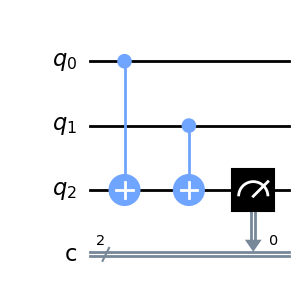

In [10]:
from qiskit import QuantumCircuit
from qiskit.providers.aer import AerSimulator

qc = QuantumCircuit(3,2) # creates the circuit

qc.cx(0,2) 
qc.cx(1,2) # applies the CNOT gate to the two inputs (q0, q1) and stores the result in another qubit q2

qc.measure(2,0) # measures the result in q2, and saves it as our first classical bit (c0)

qc.draw('mpl') # creates a drawing of the quantum circuit


In [8]:
sim = AerSimulator()
job = sim.run(qc)  # run the experiment
result = job.result()   # get the results
list(result.get_counts())[0][-1]


'0'

By default, our 2 qubits are set to "0", which is why we got "0" as our classical bit result. We can change their values using a NOT quantum gate and we can see how the result varies.

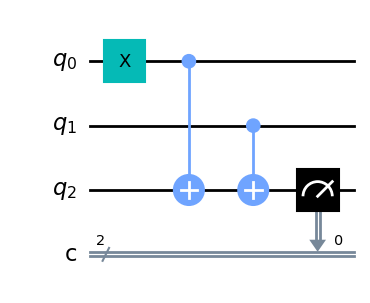

In [14]:
qc = QuantumCircuit(3,2) # creates the circuit

qc.x(0) # changes the q0 state from "0" to "1"
qc.cx(0,2) 
qc.cx(1,2) # applies the CNOT gate to the two inputs (q0, q1) and stores the result in another qubit q2

qc.measure(2,0) # measures the result in q2, and saves it as our first classical bit (c0)

qc.draw('mpl') # creates a drawing of the quantum circuit




In [18]:
job = sim.run(qc)  # run the experiment
result = job.result()   # get the results
list(result.get_counts())[0][-1]

'1'

Now our result is "1", as expected. If we applied the NOT gate to the other qubit instead, it would yield the same result. If both qubits are set to "1", then the measurement will give "0" as expected

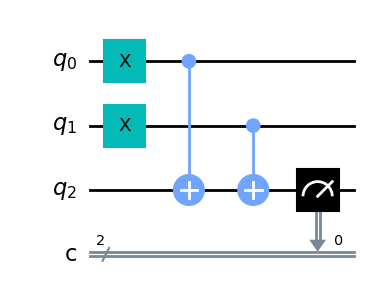

In [19]:
qc = QuantumCircuit(3,2) # creates the circuit

qc.x(0) # changes the q0 state from "0" to "1"
qc.x(1) # changes the q1 state from "0" to "1"

qc.cx(0,2) 
qc.cx(1,2) # applies the CNOT gate to the two inputs (q0, q1) and stores the result in another qubit q2

qc.measure(2,0) # measures the result in q2, and saves it as our first classical bit (c0)

qc.draw('mpl') # creates a drawing of the quantum circuit

In [20]:
job = sim.run(qc)  # run the experiment
result = job.result()   # get the results
list(result.get_counts())[0][-1]

'0'